In [ ]:
# reference: https://www.tensorflow.org/tutorials/generative/style_transfer
# cat photos dataset: https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download
#imports
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import random

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

#get pretrained model from hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
#functions from tutorial
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

#for testing
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)


# converts tensor output from model to image 
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)
  # TODO save image to drive

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


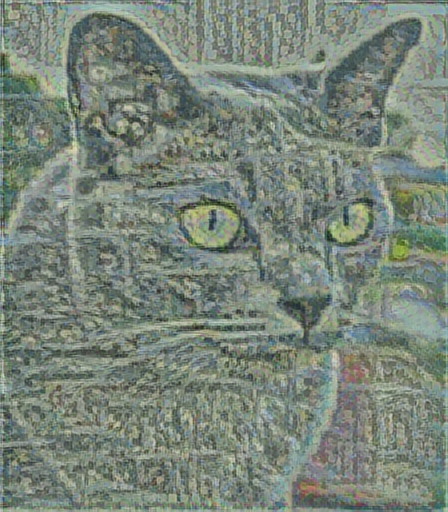

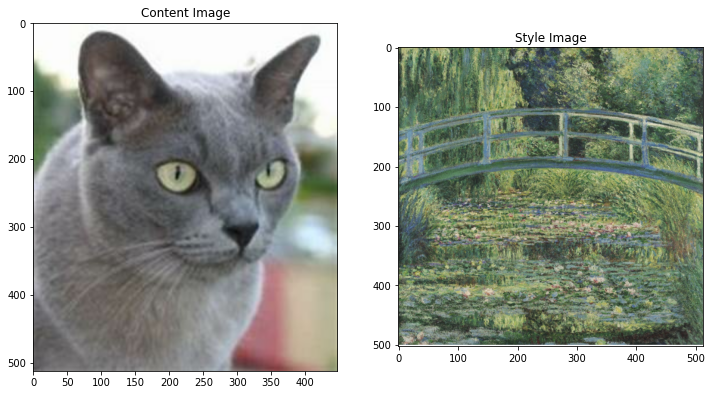

In [ ]:
#BLOCK FOR LOCAL TESTING
# pick random content image and style image
content_images_path = "gdrive/MyDrive/GuessArt/content"
style_images_path = "gdrive/MyDrive/GuessArt/styles"

content_files = os.listdir(content_images_path)
style_files = os.listdir(style_images_path)

rand_content = random.choice(content_files)
rand_style = random.choice(style_files)

content_image = load_img(f"gdrive/MyDrive/GuessArt/content/{rand_content}")
style_image = load_img(f"gdrive/MyDrive/GuessArt/styles/{rand_style}")

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

# generate 
generated_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
img_output = tensor_to_image(generated_image)

img_output

In [ ]:
# content and style images loaded from drive
content_images_path = "gdrive/MyDrive/GuessArt/content"
style_images_path = "gdrive/MyDrive/GuessArt/styles"

content_files = os.listdir(content_images_path)
style_files = os.listdir(style_images_path)

# generate 100 images
for i in range(100):
  # pick a random content and style image
  rand_content = random.choice(content_files)
  rand_style = random.choice(style_files)
  # load images
  content_image = load_img(f"gdrive/MyDrive/GuessArt/content/{rand_content}")
  style_image = load_img(f"gdrive/MyDrive/GuessArt/styles/{rand_style}")
  # generate content image with style
  generated_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
  img_output = tensor_to_image(generated_image)
  # save the image, filename prefixed with genre
  style_genre = rand_style.split('_')[0]
  filename = style_genre + "_" + rand_content
  img_output.save(f"gdrive/MyDrive/GuessArt/generated/{filename}")